In [37]:
import numpy as np
import math as m
import scipy
import matplotlib.pyplot as plt
import pymc

## Problem 1

In [38]:
def T22(x,phi,h):
    a    = 0.95
    b    = 0.95
    k    = 2.37
    L    = 70
    Tamb = 21.29
    gamma = np.sqrt(2*(a+b)*h/(a*b*k))
    c1_1  = -1*phi/(k*gamma)
    ep = m.e**(gamma*L)*(h+k*gamma)
    en = m.e**(-1*gamma*L)*(h-k*gamma)
    c1_2 = ep/(en+ep)
    c1 = c1_1*c1_2
    c2 = (phi/(k*gamma))+c1
    return (c1*m.e**(-1*gamma*x)+c2*m.e**(gamma*x)+Tamb)

In [39]:
from scipy import optimize
x    = np.array([10,14,18,22,26,30,34,38,42,46,50,54,58,62,66])
temp = np.array([96.14,80.12,67.66,57.96,50.90,44.84,39.75,36.16,33.31,31.15,29.28,27.88,27.18,26.40,25.86])

popt, pcov = optimize.curve_fit(T22, x, temp, p0 = [10,.00191])#, bounds=(0, [3., 1., 0.5]))

popt

array([-1.84148511e+01,  1.91432142e-03])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


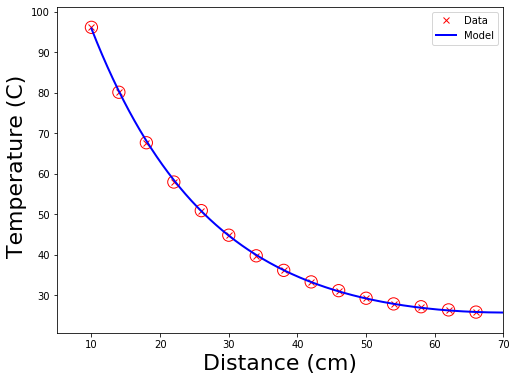

In [40]:
plt.figure(figsize=(8,6))
plt.plot(x,temp,'rx',label='Data')
plt.scatter(x, temp, s=150, facecolors='none', edgecolors='r')
x1 = np.linspace(10,70,1000)
plt.plot(x1,T22(x1,-18.41 , .00191),'b',linewidth=2,label='Model')
plt.xlabel("Distance (cm)", fontsize = 22)
plt.ylabel(" Temperature (C)", fontsize = 22)
plt.legend()
plt.xlim(5,70)
plt.savefig("P1_fit.eps")

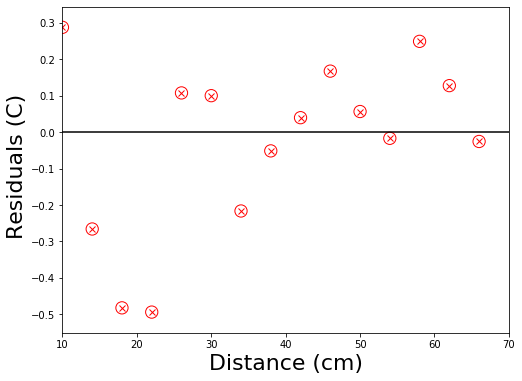

In [41]:
plt.figure(figsize=(8,6))
xb = np.linspace(0,70,1000)
Res = -1*(temp-T22(x,-18.41 , .00191))
plt.plot(x,-1*Res,'rx')
plt.scatter(x, -1*Res, s=150, facecolors='none', edgecolors='r')
plt.plot(xb,np.zeros(np.size(xb)),'k')
plt.xlabel("Distance (cm)", fontsize = 22)
plt.ylabel(" Residuals (C)", fontsize = 22)
plt.xlim([10,70])
plt.savefig("P1_res.eps")

In [42]:
pcov

array([[ 1.93898622e-02, -1.87350573e-06],
       [-1.87350573e-06,  1.94041152e-10]])

In [43]:
from pymc_dram import DRAM

In [44]:
import matplotlib as mpl
mpl.use('TkAgg')

import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pymc as P

from pymc_dram import DRAM

In [58]:
h0   = 0.0019
hMIN = 0.0024
hMAX = 0.0014
H = P.Uniform('H',value=h0, lower=hMAX, upper=hMIN)

Phi0   = -18.4
PhiMIN = -28.4
PhiMAX = -8.4
Phi = P.Uniform('Phi',value=Phi0, lower=PhiMIN, upper=PhiMAX)

X = np.linspace(0,70,1000)

@P.deterministic(plot=False)
def T(x=X,phi=Phi,h=H):
    a    = 0.95
    b    = 0.95
    k    = 2.37
    L    = 70
    Tamb = 21.29
    gamma = np.sqrt(2*(a+b)*h/(a*b*k))
    c1_1  = -1*phi/(k*gamma)
    ep = m.e**(gamma*L)*(h+k*gamma)
    en = m.e**(-1*gamma*L)*(h-k*gamma)
    c1_2 = ep/(en+ep)
    c1 = c1_1*c1_2
    c2 = (phi/(k*gamma))+c1
    return (c1*m.e**(-1*gamma*x)+c2*m.e**(gamma*x)+Tamb)


In [78]:
def model_factory():
    h0   = 0.0019
    hMIN = 0.024
    hMAX = 0.00014
    H = P.Uniform('H',value=h0, lower=hMAX, upper=hMIN)

    Phi0   = -18.4
    PhiMIN = -28.4
    PhiMAX = -8.4
    Phi = P.Uniform('Phi',value=Phi0, lower=PhiMIN, upper=PhiMAX)

    X = np.linspace(0,70,1000)

    @P.deterministic(plot=False)
    def T(x=X,phi=Phi,h=H):
        a    = 0.95
        b    = 0.95
        k    = 2.37
        L    = 70
        Tamb = 21.29
        gamma = np.sqrt(2*(a+b)*h/(a*b*k))
        c1_1  = -1*phi/(k*gamma)
        ep = m.e**(gamma*L)*(h+k*gamma)
        en = m.e**(-1*gamma*L)*(h-k*gamma)
        c1_2 = ep/(en+ep)
        c1 = c1_1*c1_2
        c2 = (phi/(k*gamma))+c1
        return (c1*m.e**(-1*gamma*x)+c2*m.e**(gamma*x)+Tamb)
    return locals()

In [85]:
mvars = model_factory()
M =P.MCMC(mvars)


M.sample(iter=100000, burn=500,thin=10)


 [-----------------100%-----------------] 100000 of 100000 complete in 19.2 sec

(array([ 997., 1001., 1038.,  964.,  958.,  985., 1040.,  991., 1009.,
         967.]),
 array([0.00014057, 0.00252627, 0.00491198, 0.00729768, 0.00968339,
        0.0120691 , 0.0144548 , 0.01684051, 0.01922621, 0.02161192,
        0.02399763]),
 <a list of 10 Patch objects>)

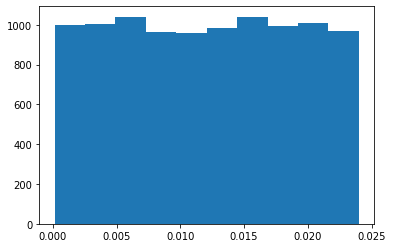

In [86]:
from pylab import hist,show
hist(M.trace('H')[:])

Plotting H
Plotting Phi


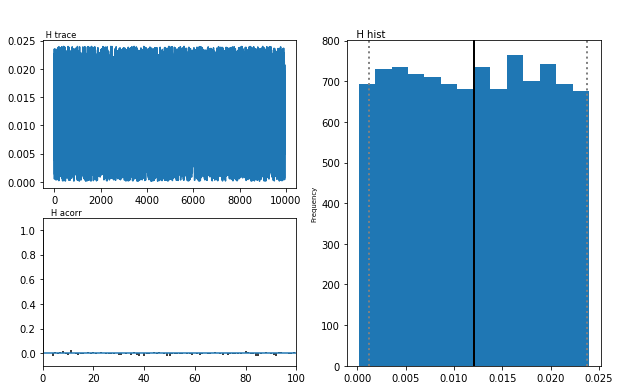

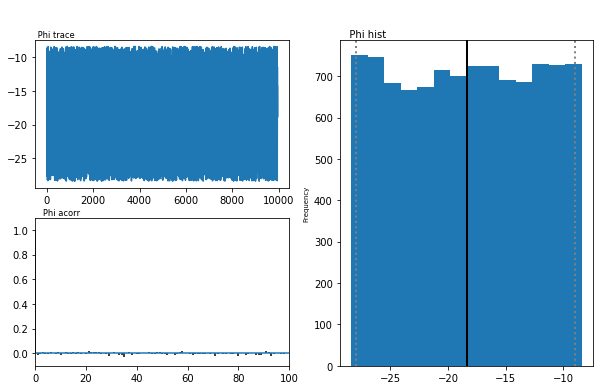

In [87]:
from pymc.Matplot import plot
plot(M)

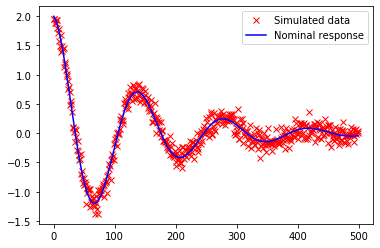

In [22]:

NS = int(2e3)

K = 20.5
C0 = 1.5
CMIN, CMAX = 0.5, 2.5

SIGMA = 0.1

NT = 500
TMIN, TMAX = 0, 5
T = np.linspace(TMIN, TMAX, NT)

def model(C):
    return 2. * np.exp(-C * T / 2.) * np.cos(np.sqrt(K - (C ** 2) / 4.) * T) 

nominal = model(C0)
data = nominal + np.random.normal(0, SIGMA, len(T))

plt.figure()
plt.plot(data, 'rx', label="Simulated data")
plt.plot(nominal,'b', label="Nominal response")
plt.legend()
plt.show()


# MODEL DESCRIPTION TILL THIS POINT


1.5
 [-----------------100%-----------------] 2000 of 2000 complete in 14.5 secPlotting C


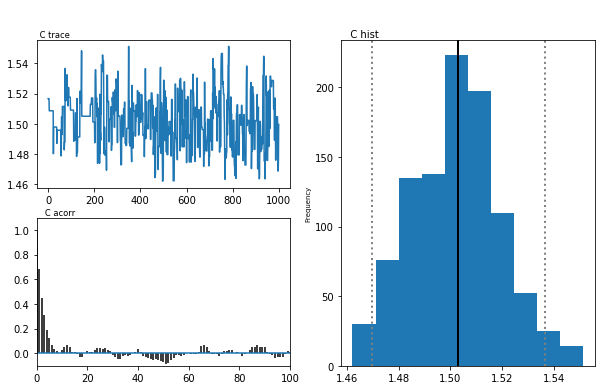

In [33]:

def model_factory():
    C = P.Uniform("C", value=C0, lower=CMIN, upper=CMAX)
    print(C0)
    @P.deterministic(plot=False)
    def response(C=C):
        return model(C)

    Y = P.MvNormalCov(
        'Y',
        response,
        (SIGMA ** 2) * np.eye(NT),
        observed=True,
        plot=False,
        value=data,
    )

    return locals()

mvars = model_factory()
M = P.MCMC(mvars)

M.use_step_method(
    # P.AdaptiveMetropolis,
    DRAM,
    [mvars["C"]],
    # verbose=3,
) 

M.sample(NS, burn=NS / 2)

# plt.figure()
P.Matplot.plot(M)
#plt.show()

In [24]:
help(pymc)

Help on package pymc:

NAME
    pymc - Markov Chain Monte Carlo sampling toolkit.

DESCRIPTION
    Bayesian estimation, particularly using Markov chain Monte Carlo (MCMC), is an increasingly relevant approach to statistical estimation. However, few statistical software packages implement MCMC samplers, and they are non-trivial to code by hand. pymc is a python package that implements the Metropolis-Hastings algorithm as a python class, and is extremely flexible and applicable to a large suite of problems. pymc includes methods for summarizing output, plotting, goodness-of-fit and convergence diagnostics.
    
    pymc only requires NumPy. All other dependencies such as matplotlib, SciPy, pytables, or sqlite are optional.

PACKAGE CONTENTS
    CircularStochastic
    CommonDeterministics
    Container
    Container_values
    InstantiationDecorators
    LazyFunction
    MCMC
    Matplot
    Model
    Node
    NormalApproximation
    NumpyDeterministics
    PyMCObjects
    ScipyDistributi

In [30]:
M